# Handling Imbalanced Data

### Upload Needed Libraries

In [45]:
# ------------ HELPING LIBRARIES -----------
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# ------------- HANDLING IMBALANCING ------------
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, EditedNearestNeighbours, TomekLinks
 

### Load Sample Data

In [29]:
# Use "Churn Modelling" dataset as sample data 
Churn_df = pd.read_csv('Churn_Modeling(cleaned).csv')

### Check Imbalancing 

<Axes: xlabel='Exited'>

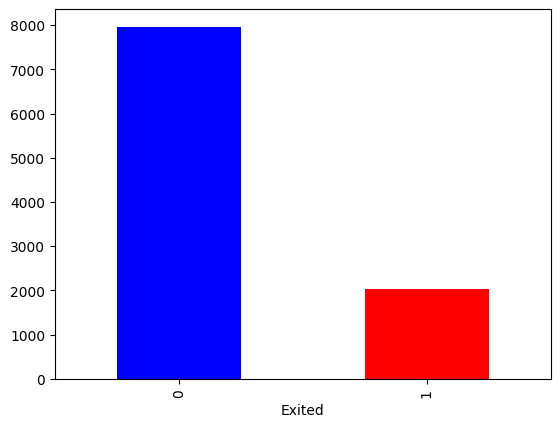

In [30]:
# Use bar plot to visualize the Imbalanced data
Churn_df['Exited'].value_counts().plot(kind = 'bar', color = ['blue', 'red'])

### Handling Imbalanced Data 


Techniques for handling imbalanced data:
- Over-Sampling 
- Under-Sampling
- Hybrid Sampling



 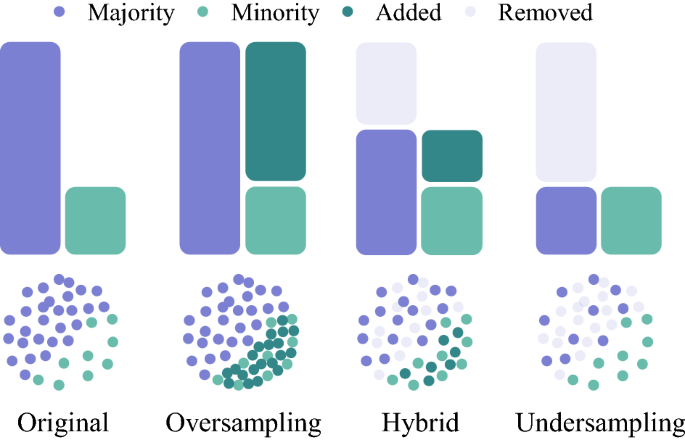

In [31]:
# Split dataset to train & test before applying any of the above techniques

# Define Features and targets
X = Churn_df.drop(['Exited'], axis=1)
y = Churn_df['Exited']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### #1 Over-Sampling Technique

Types of oversampling:
1. **Random oversampling**
2. **SMOT technique**

In [32]:
# Apply Random Oversampling Technique 
random_oversampler = RandomOverSampler(random_state=42)
X_resampled_random, y_resampled_random = random_oversampler.fit_resample(X_train, y_train)

# Print number of instances before & after oversampling 
print(f"\nBefore Random Oversampling: {Counter(y_train)}")
print(f"\nAfter Random Oversampling: {Counter(y_resampled_random)}")


Before Random Oversampling: Counter({0: 5547, 1: 1453})

After Random Oversampling: Counter({1: 5547, 0: 5547})


In [33]:
# Apply SMOTE Technique
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Print number of instances before & after SMOTE
print(f"\nBefore SMOTE: {Counter(y_train)}")
print(f"\nAfter SMOTE: {Counter(y_resampled_smote)}")


Before SMOTE: Counter({0: 5547, 1: 1453})

After SMOTE: Counter({1: 5547, 0: 5547})


#### #2 Under-Sampling Technique

Types of undersampling:
1. **Random undersampling**
2. **Nearmiss technique** 

In [36]:
# Apply Random undersampling Technique
random_undersampler = RandomUnderSampler(random_state=42)
X_resampled_random, y_resampled_random = random_undersampler.fit_resample(X_train, y_train)

# Print number of instances before & after random undersampling
print(f"\nBefore random undersampling: {Counter(y_train)}")
print(f"\nAfter random undersampling: {Counter(y_resampled_random)}")


Before random undersampling: Counter({0: 5547, 1: 1453})

After random undersampling: Counter({0: 1453, 1: 1453})


Choosing **Nearmiss** version:
- version 1: It keeps the majority class instances that have the smallest average distance to a specified number of minority class instances.
- version 2: It keeps focus on majority class samples that are more difficult to classify, helping the model distinguish between classes.
- version 3: It selects majority class samples based on the distance to all minority class samples. This version is more aggressive in balancing the dataset by focusing on the global separation between the classes.

In [37]:
# Apply Nearmiss Technique
nearmiss = NearMiss(version=1)
X_resampled_nearmiss, y_resampled_nearmiss = nearmiss.fit_resample(X_train, y_train)

# Print number of instances before & after Nearmiss
print(f"\nBefore Nearmiss: {Counter(y_train)}")
print(f"\nAfter Nearmiss: {Counter(y_resampled_nearmiss)}")


Before Nearmiss: Counter({0: 5547, 1: 1453})

After Nearmiss: Counter({0: 1453, 1: 1453})


#### #3 Hybrid Sampling Technique

Most common types of Hybrid Sampling:
- SMOTE + Edited Nearest Neighbors (ENN)
- SMOTE + Tomek Links

In [44]:
# Hybrid Sampling using (SMOTE + ENN)

# Step 1: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Step 2: Apply ENN to clean dataset
enn = EditedNearestNeighbours(n_neighbors=3)
X_resampled_hybrid, y_resampled_hybrid = enn.fit_resample(X_resampled_smote, y_resampled_smote)


# Print number of instances before & after Hybrid sampling 
print(f"\nBefore Hybrid sampling: {Counter(y_train)}")
print(f"\nAfter Hybrid sampling: {Counter(y_resampled_hybrid)}")


Before Hybrid sampling: Counter({0: 5547, 1: 1453})

After Hybrid sampling: Counter({0: 5547, 1: 2516})


In [46]:
# Hybrid Sampling using (SMOTE + Tomek links)

# Step 1: Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Step 2: Apply Tomek links to clean dataset
tomek = TomekLinks()
X_resampled_hybrid, y_resampled_hybrid = tomek.fit_resample(X_resampled_smote, y_resampled_smote)

# Print number of instances before & after Hybrid sampling 
print(f"\nBefore Hybrid sampling: {Counter(y_train)}")
print(f"\nAfter Hybrid sampling: {Counter(y_resampled_hybrid)}")


Before Hybrid sampling: Counter({0: 5547, 1: 1453})

After Hybrid sampling: Counter({0: 5547, 1: 4730})
